## World Food Production Estimation
- Dataset: https://www.kaggle.com/datasets/rafsunahmad/world-food-production/data

Import bibliotek

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

# Analiza i przygotowanie danych


In [ ]:
food = pd.read_csv("sample_data/world food production.csv")
food.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'sample_data/world food production.csv'

In [ ]:
food.shape

(11912, 24)

In [ ]:
food.dtypes.value_counts()

,count
float64,22
object,1
int64,1


In [ ]:
food.describe()

,Year,Maize Production (tonnes),Rice Production ( tonnes),Yams Production (tonnes),Wheat Production (tonnes),Tomatoes Production (tonnes),Tea Production ( tonnes ),Sweet potatoes Production (tonnes),Sunflower seed Production (tonnes),Sugar cane Production (tonnes),...,Oranges Production (tonnes),"Peas, dry Production ( tonnes)",Palm oil Production (tonnes),Grapes Production (tonnes),"Coffee, green Production ( tonnes)",Cocoa beans Production (tonnes),"Meat, chicken Production (tonnes)",Bananas Production ( tonnes),Avocados Production (tonnes),Apples Production (tonnes)
count,11912.000000,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,...,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04,1.191200e+04
mean,1992.115346,1.926434e+07,2.254542e+07,2.744973e+06,2.365684e+07,3.238661e+06,1.350523e+05,5.021303e+06,1.410297e+06,5.218411e+07,...,2.176532e+06,6.375701e+05,1.502615e+06,3.623623e+06,3.549990e+05,2.191661e+05,1.165719e+06,2.653282e+06,1.564768e+05,3.260419e+06
std,17.606091,7.028022e+07,7.749779e+07,8.787786e+06,6.177899e+07,1.146992e+07,2.544264e+05,2.001692e+07,3.625725e+06,1.527085e+08,...,6.078086e+06,1.527103e+06,6.144476e+06,8.225799e+06,8.785398e+05,5.835509e+05,4.050976e+06,8.178866e+06,4.239785e+05,8.748227e+06
min,1961.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1977.000000,2.379300e+04,3.902475e+04,1.176250e+04,8.892500e+04,1.250000e+04,2.040000e+03,7.082605e+03,1.537675e+04,3.312100e+05,...,1.182728e+04,5.196345e+03,1.384195e+04,6.757700e+04,3.119250e+03,1.092024e+03,3.882640e+03,1.007145e+04,3.681500e+03,4.431650e+04
50%,1993.000000,4.000490e+05,4.543745e+05,1.236055e+05,1.650000e+06,1.291410e+05,2.564550e+04,7.828400e+04,1.481504e+05,3.275770e+06,...,1.469060e+05,4.755700e+04,7.887600e+04,4.680664e+05,3.229550e+04,9.160000e+03,3.659000e+04,1.508370e+05,3.577800e+04,4.222070e+05
75%,2007.000000,4.979875e+06,4.440542e+06,5.721030e+05,1.524149e+07,8.691358e+05,1.192675e+05,7.472216e+05,1.115602e+06,2.507227e+07,...,1.434050e+06,4.269712e+05,4.145059e+05,3.080176e+06,2.126140e+05,1.250475e+05,3.547400e+05,1.187962e+06,1.160314e+05,1.950000e+06
max,2021.000000,1.210235e+09,7.872939e+08,7.871405e+07,7.723055e+08,1.891340e+08,2.524670e+06,1.528620e+08,5.818563e+07,1.958234e+09,...,7.656665e+07,1.663746e+07,7.906779e+07,8.001590e+07,1.079544e+07,5.780850e+06,5.017566e+07,1.249786e+08,8.685672e+06,9.314436e+07


In [ ]:
food.describe(include=[object])

,Entity
count,11912
unique,226
top,Afghanistan
freq,61


In [ ]:
food.duplicated().any()

np.False_

Przedział lat: 1961-2021

In [ ]:
food.Year.unique()

array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021])

Transformacja danych

In [ ]:
food_divided = pd.melt(food, id_vars=['Entity', 'Year'], var_name='Food', value_name='Value')

In [ ]:
food_divided.head()

,Entity,Year,Food,Value
0,Afghanistan,1961,Maize Production (tonnes),700000.0
1,Afghanistan,1962,Maize Production (tonnes),700000.0
2,Afghanistan,1963,Maize Production (tonnes),713000.0
3,Afghanistan,1964,Maize Production (tonnes),720000.0
4,Afghanistan,1965,Maize Production (tonnes),720000.0


In [ ]:
food_divided.shape

(262064, 4)

Encoding danych

In [ ]:
# le_entity = LabelEncoder()
# le_food = LabelEncoder()
# food_divided['Entity'] = le_entity.fit_transform(food_divided['Entity'])
# food_divided['Food'] = le_food.fit_transform(food_divided['Food'])

# One hot encoding
food_divided = pd.get_dummies(food_divided, columns=['Entity', 'Food'])
food_divided.head()

,Year,Value,Entity_Afghanistan,Entity_Africa,Entity_Africa (FAO),Entity_Albania,Entity_Algeria,Entity_Americas (FAO),Entity_Angola,Entity_Antigua and Barbuda,...,Food_Rice Production ( tonnes),Food_Rye Production (tonnes),Food_Soybeans Production (tonnes),Food_Sugar cane Production (tonnes),Food_Sunflower seed Production (tonnes),Food_Sweet potatoes Production (tonnes),Food_Tea Production ( tonnes ),Food_Tomatoes Production (tonnes),Food_Wheat Production (tonnes),Food_Yams Production (tonnes)
0,1961,700000.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1962,700000.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1963,713000.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1964,720000.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1965,720000.0,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
zero_values = (food_divided['Value'] == 0).sum()
print(f"Liczba wartości zerowych w kolumnie 'Value': {zero_values}")

Liczba wartości zerowych w kolumnie 'Value': 3912


Dystrybucja danych na początku

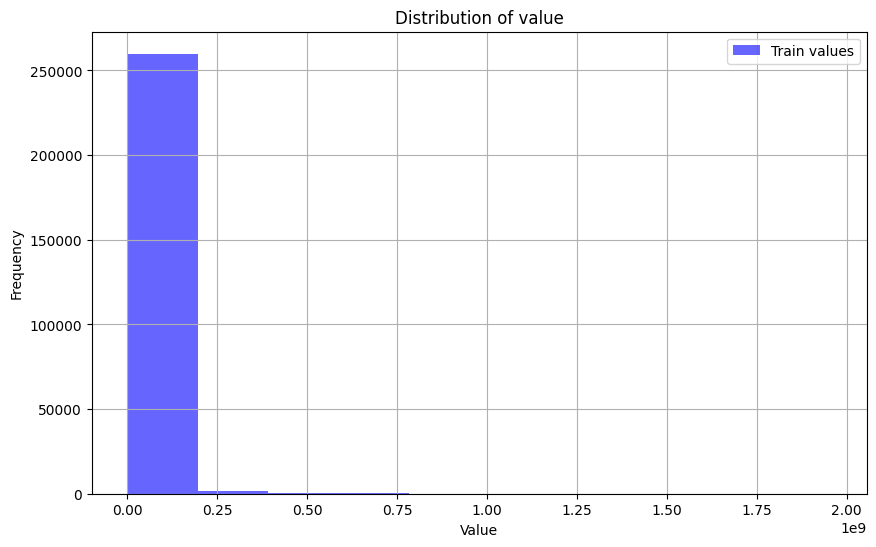

In [ ]:
food_val = food_divided['Value']

plt.figure(figsize=(10, 6))
plt.hist(food_val, bins=10, alpha=0.6, label='Train values', color='blue')
plt.title('Distribution of value')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

Usunięcie danych granicznych

In [ ]:
lower_bound = food_divided['Value'].quantile(.1)
upper_bound = food_divided['Value'].quantile(.6)
print("Zakres wartości", lower_bound, "-", upper_bound)

food_filtered = food_divided[(food_divided['Value'] >= lower_bound) & (food_divided['Value'] <= upper_bound)].copy()
print(f"Liczba przefiltrowanych danych: {len(food_filtered)}")

Zakres wartości 880.36 - 300000.0
Liczba przefiltrowanych danych: 131128


In [ ]:
X = food_filtered.drop(columns=['Value']).to_numpy()
Y = np.log1p(food_filtered['Value'].to_numpy()) # Logarytmiczna transformacja danych

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

Dystrybucja danych po transformacji logarytmicznej

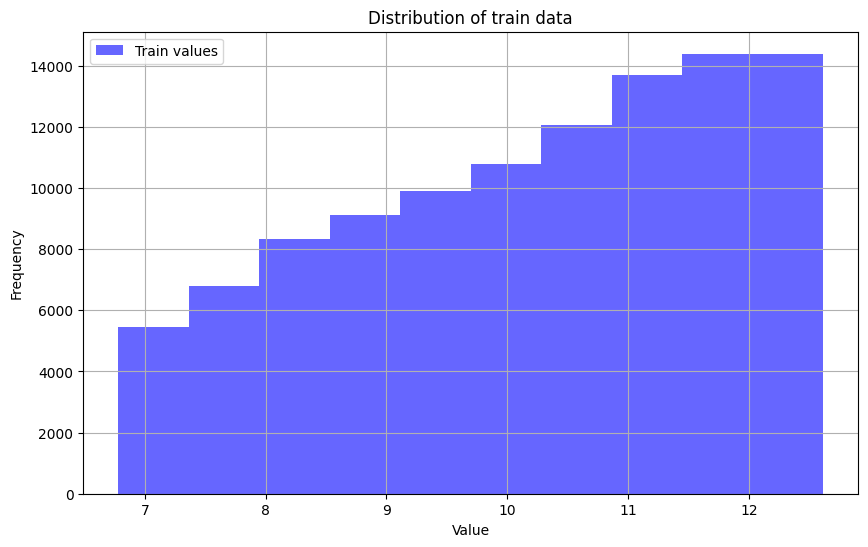

In [ ]:
train_val = Y_train.flatten()

plt.figure(figsize=(10, 6))

plt.hist(train_val, bins=10, alpha=0.6, label='Train values', color='blue')

plt.title('Distribution of train data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_val_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

Y_train_tensor = torch.tensor(Y_train, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_test, dtype=torch.float32)

In [ ]:
class FoodProductionNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(249, 128),
            nn.ReLU(),
            nn.Linear(128, 64), # Ukryta warstwa
            nn.ReLU(),
            nn.Linear(64, 32), # Ukryta warstwa
            nn.ReLU(),
            nn.Linear(32, 16), # Ukryta warstwa
            nn.ReLU(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
model = FoodProductionNN()
criterion = nn.SmoothL1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

model.train()

for epoch in range(1000):
    y_pred_scaled = model(X_train_tensor)
    loss = criterion(y_pred_scaled, Y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")



Epoch 0, Loss: 9.0767
Epoch 50, Loss: 1.3089
Epoch 100, Loss: 0.8176
Epoch 150, Loss: 0.7420
Epoch 200, Loss: 0.6807
Epoch 250, Loss: 0.6135
Epoch 300, Loss: 0.5347
Epoch 350, Loss: 0.4617
Epoch 400, Loss: 0.4066
Epoch 450, Loss: 0.3648
Epoch 500, Loss: 0.3343
Epoch 550, Loss: 0.3087
Epoch 600, Loss: 0.2880
Epoch 650, Loss: 0.2695
Epoch 700, Loss: 0.2499
Epoch 750, Loss: 0.2351
Epoch 800, Loss: 0.2219
Epoch 850, Loss: 0.2115
Epoch 900, Loss: 0.2032
Epoch 950, Loss: 0.1961


In [ ]:
np.set_printoptions(suppress=True)

model.eval()

with torch.no_grad():
    y_pred_log = model(X_val_tensor).detach().numpy()
    y_pred = np.expm1(y_pred_log) # Reverting log transformation

    y_actual_log = Y_val_tensor.numpy()
    y_actual = np.expm1(y_actual_log)

    print(f"Predicted values:\n {y_pred[:10]}\n")
    print(f"Actual values:\n {y_actual[:10]}\n")

    mae = mean_absolute_error(y_actual, y_pred)
    print(f'Validation Mean Absolute Error (MAE): {mae:.2f}')


Predicted values:
 [[ 24007.393 ]
 [  1291.1946]
 [ 13119.569 ]
 [183388.69  ]
 [ 36854.812 ]
 [ 36414.383 ]
 [ 33970.594 ]
 [ 73219.31  ]
 [159247.62  ]
 [ 19222.902 ]]

Actual values:
 [[ 23999.998 ]
 [  1250.0001]
 [  4958.011 ]
 [153000.03  ]
 [ 34035.613 ]
 [ 80505.02  ]
 [ 52694.023 ]
 [113899.95  ]
 [ 94999.96  ]
 [ 10217.202 ]]

Validation Mean Absolute Error (MAE): 25902.45


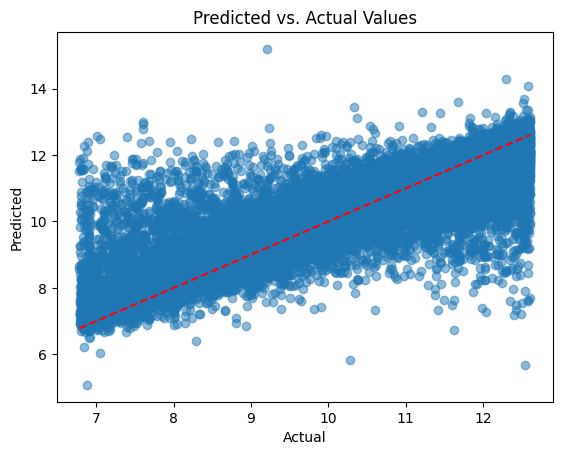

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_actual_log, y_pred_log, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs. Actual Values")

plt.plot([y_actual_log.min(), y_actual_log.max()], [y_actual_log.min(), y_actual_log.max()], 'r--')
plt.show()